In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [2]:
#the data are in different sheets in the file
data = pd.read_excel('Online Retail 2.xlsx')

data2 = pd.read_excel('Online Retail 2.xlsx', sheet_name='Year 2010-2011')

In [3]:
#combine data vertically
data = pd.concat([data[data.InvoiceDate <= '2010-12-01'], data2])
#reset dataset index
data = data.reset_index(drop=True)

In [33]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.8+ MB


In [24]:
#check data
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [4]:
#disable scientific notation 
pd.set_option('display.float_format', '{:.2f}'.format)
#statistic summary of quantity
data.Quantity.describe()

count   1044848.00
mean          9.99
std         174.22
min      -80995.00
25%           1.00
50%           3.00
75%          10.00
max       80995.00
Name: Quantity, dtype: float64

In [37]:
#returned items
data[(data.Quantity < 0)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


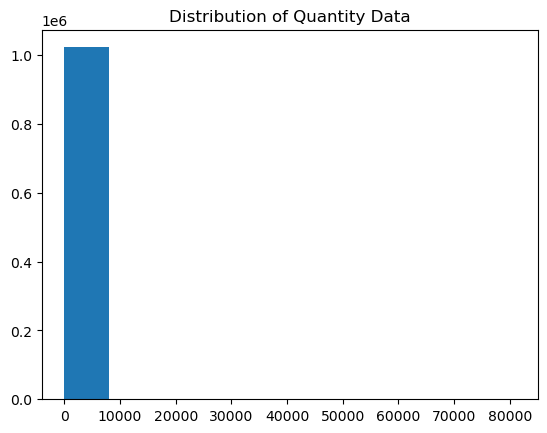

In [21]:
#show distribution of quantity data
plt.hist(data[data.Quantity > 0].Quantity)
plt.title('Distribution of Quantity Data');

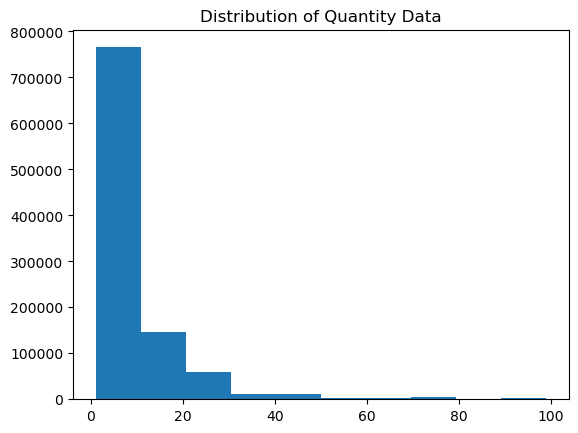

In [20]:
#show distribution of quantity data
plt.hist(data[(data.Quantity > 0) & (data.Quantity < 100)].Quantity)
plt.title('Distribution of Quantity Data');

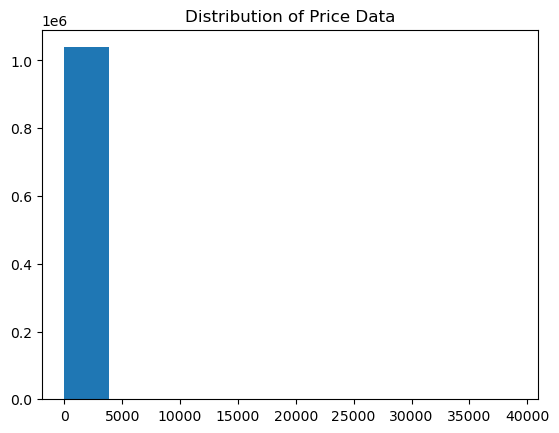

In [19]:
#show distribution of quantity data
plt.hist(data[data.Price > 0].Price)
plt.title('Distribution of Price Data');

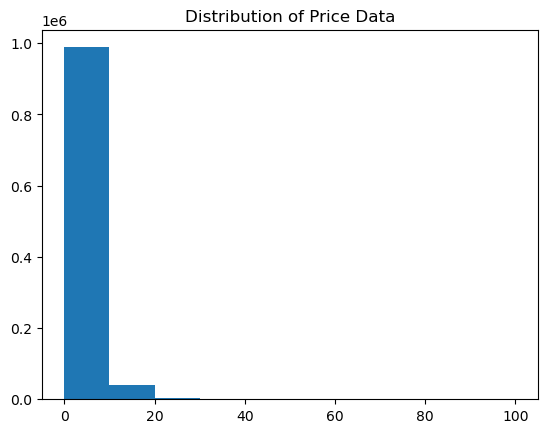

In [25]:
#show distribution of quantity data
plt.hist(data[(data.Price > 0) & (data.Price < 100)].Price)
plt.title('Distribution of Price Data');

In [ ]:
#show distribution of quantity data
plt.hist(data[data.Price > 0].Price)
plt.title('Distribution of Price Data');

In [38]:
#items with minus quantity other than returned items
data[(data.Quantity < 0) & (data['Customer ID'].isna() == True)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom


In [39]:
#missing values
data.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64

In [40]:
#extract unique stockcode & description pair
dups = data[['StockCode', 'Description']].drop_duplicates()
#check which stockcode has duplicate
dups[dups.duplicated(subset=['StockCode'], keep=False)]

,StockCode,Description
1,79323P,PINK CHERRY LIGHTS
2,79323W,WHITE CHERRY LIGHTS
4,21232,STRAWBERRY CERAMIC TRINKET BOX
6,21871,SAVE THE PLANET MUG
7,21523,FANCY FONT HOME SWEET HOME DOORMAT
...,...,...
1038274,22576,check
1039848,23090,missing
1040559,85123A,CREAM HANGING HEART T-LIGHT HOLDER
1041492,85175,NaN


In [41]:
#check records with the same stockcode
dups[dups.StockCode == 21523]

,StockCode,Description
7,21523,FANCY FONT HOME SWEET HOME DOORMAT
79320,21523,DOOR MAT FANCY FONT HOME SWEET HOME
253036,21523,DOORMAT FANCY FONT HOME SWEET HOME
332936,21523,amendment


In [42]:
#check record that is not a transaction
data[data.StockCode.isin(['ADJUST', 'ADJUST2','BANK CHARGES'])].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE


In [5]:
#add month-year feature to the dataset
data['MY'] = data.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))

#add the transaction value
data['Value'] = data.Quantity * data.Price

#add date data without the time
data['Date'] = data.InvoiceDate.dt.date

In [44]:
#check data
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009-12,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009-12,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009-12,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009-12,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009-12,30.00,2009-12-01


In [45]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
 8   MY           1044848 non-null  object        
 9   Value        1044848 non-null  float64       
 10  Date         1044848 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 87.7+ MB


In [46]:
#check data with no description
data[(data.Description.isna()==True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,2009-12,-0.00,2009-12-01
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom,2009-12,-0.00,2009-12-01
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.00,NaN,United Kingdom,2009-12,0.00,2009-12-01
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom,2009-12,0.00,2009-12-02
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.00,NaN,United Kingdom,2009-12,-0.00,2009-12-02
...,...,...,...,...,...,...,...,...,...,...,...
1038260,581199,84581,NaN,-2,2011-12-07 18:26:00,0.00,NaN,United Kingdom,2011-12,-0.00,2011-12-07
1038264,581203,23406,NaN,15,2011-12-07 18:31:00,0.00,NaN,United Kingdom,2011-12,0.00,2011-12-07
1038270,581209,21620,NaN,6,2011-12-07 18:35:00,0.00,NaN,United Kingdom,2011-12,0.00,2011-12-07
1039919,581234,72817,NaN,27,2011-12-08 10:33:00,0.00,NaN,United Kingdom,2011-12,0.00,2011-12-08


In [47]:
#check if all data with no description has no customer ID
len(data[(data.Description.isna()==True)]) == \
len(data[(data.Description.isna()==True) & (data['Customer ID'].isna() == True)])

True

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
 8   MY           1044848 non-null  object        
 9   Value        1044848 non-null  float64       
 10  Date         1044848 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 87.7+ MB


In [6]:
#removed all missing values
data.dropna(inplace=True)

In [53]:
#data with not item description
data[data.Description.str.contains('POSTAGE|DOTCOM|Manual')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France,2009-12,54.00,2009-12-01
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA,2009-12,141.00,2009-12-01
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium,2009-12,130.00,2009-12-01
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany,2009-12,108.00,2009-12-01
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom,2009-12,-9.58,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
1044479,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom,2011-12,-224.69,2011-12-09
1044668,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.00,Germany,2011-12,18.00,2011-12-09
1044705,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.00,Germany,2011-12,36.00,2011-12-09
1044706,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.00,Germany,2011-12,54.00,2011-12-09


In [57]:
#carriage records in the data
data[data.StockCode.isin([23444, 'C2'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE,2009-12,50.00,2009-12-03
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE,2009-12,50.00,2009-12-07
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom,2009-12,50.00,2009-12-08
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE,2009-12,50.00,2009-12-10
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.00,14156.00,EIRE,2009-12,50.00,2009-12-15
...,...,...,...,...,...,...,...,...,...,...,...
1028363,580622,23444,Next Day Carriage,1,2011-12-05 12:09:00,15.00,17006.00,United Kingdom,2011-12,15.00,2011-12-05
1028376,580630,23444,Next Day Carriage,1,2011-12-05 12:11:00,15.00,12913.00,United Kingdom,2011-12,15.00,2011-12-05
1037029,581132,23444,Next Day Carriage,1,2011-12-07 12:55:00,15.00,17590.00,United Kingdom,2011-12,15.00,2011-12-07
1039801,581221,23444,Next Day Carriage,1,2011-12-08 09:40:00,15.00,17856.00,United Kingdom,2011-12,15.00,2011-12-08


In [7]:
#remove description postage & manual
data.drop(data[data.Description.str.contains('POSTAGE|DOTCOM|Manual')].index, inplace=True)

#remove carriage, next day carriage, test, discount, cruk, and pads
data.drop(data[data.StockCode.isin([23444, 'C2', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'ADJUST2', 'CRUK', 'D', \
                                    'BANK CHARGES'])].index, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805809 entries, 0 to 1044846
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805809 non-null  object        
 1   StockCode    805809 non-null  object        
 2   Description  805809 non-null  object        
 3   Quantity     805809 non-null  int64         
 4   InvoiceDate  805809 non-null  datetime64[ns]
 5   Price        805809 non-null  float64       
 6   Customer ID  805809 non-null  float64       
 7   Country      805809 non-null  object        
 8   MY           805809 non-null  object        
 9   Value        805809 non-null  float64       
 10  Date         805809 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 73.8+ MB


In [8]:
#check price difference for an item
data[(data.StockCode == 22041) & (data.Quantity > 0)].drop_duplicates(subset='Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009-12,100.80,2009-12-01
7748,490069,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2009-12-03 14:07:00,2.55,13085.00,United Kingdom,2009-12,30.60,2009-12-03
864278,568346,22041,"RECORD FRAME 7"" SINGLE SIZE",2,2011-09-26 15:28:00,4.96,14096.00,United Kingdom,2011-09,9.92,2011-09-26


In [66]:
#create new data for only stockcode & price to check price
d_price = data[(data.Quantity > 0) & (data.Price > 0)][['StockCode', 'Price']]

#calculate the range using max - min price
d_price = d_price.groupby('StockCode')['Price'].agg(lambda x: x.max() - x.min()).reset_index()

#check item with high price difference
d_price[d_price.Price > 50]

,StockCode,Price
941,21760,75.00
1564,22502,647.50
1711,22655,245.00
1712,22656,245.00
1878,22826,110.00
3137,85070,55.00
4122,84965B,99.95
4126,84967A,64.95
4127,84967B,54.95


In [69]:
#check the highest difference
data[(data.StockCode == 22502)].drop_duplicates(subset='Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
206913,509394,22502,PICNIC BASKET WICKER SMALL,4,2010-05-23 10:54:00,4.25,13647.00,United Kingdom,2010-05,17.00,2010-05-23
206936,509396,22502,PICNIC BASKET WICKER SMALL,16,2010-05-23 11:02:00,3.75,13330.00,United Kingdom,2010-05,60.00,2010-05-23
324452,521001,22502,PICNIC BASKET WICKER SMALL,4,2010-09-01 13:44:00,5.95,17926.00,United Kingdom,2010-09,23.80,2010-09-01
349870,523370,22502,PICNIC BASKET WICKER SMALL,18,2010-09-21 18:42:00,4.95,17926.00,United Kingdom,2010-09,89.10,2010-09-21
725609,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.00,United Kingdom,2011-06,38970.00,2011-06-10
862414,568188,22502,PICNIC BASKET WICKER SMALL,1,2011-09-25 14:33:00,2.00,16049.00,United Kingdom,2011-09,2.00,2011-09-25


In [9]:
#delete the outlier
data.drop(data[data.Description == 'PICNIC BASKET WICKER 60 PIECES'].index, inplace=True)

In [71]:
#check if total stock code equal to total description
len(data.StockCode.unique()) == len(data.Description.unique())

False

In [10]:
#create new dataframe for the dictionary
df = data[['StockCode', 'Description']].dropna()
                   
#delete duplicates based on the stockcode
df = df.drop_duplicates(subset='StockCode', keep='first')

#create dictionary with description as values and stockcode as key
dfdict = pd.Series(df.Description.values,index=df.StockCode).to_dict()

#apply the dictionary to the original dataset
data.loc[:,'Description'] = data.StockCode.map(dfdict)

In [75]:
#check again if the stock code & description are equal
print(len(data.StockCode.unique()))
print(len(data.Description.unique()))

4632
4610


In [11]:
#create new dataframe for the dictionary
df2 = data[['StockCode', 'Description']].dropna()
                   
#delete duplicates based on the description
df2 = df2.drop_duplicates(subset='Description', keep='first')

#create dictionary with stockcode as values and description as key
dfdict2 = pd.Series(df2.StockCode.values,index=df2.Description).to_dict()

#apply the dictionary to the original dataset
data.loc[:,'StockCode'] = data.Description.map(dfdict2)

In [77]:
#the number should be equal
print(len(data.StockCode.unique()))
print(len(data.Description.unique()))

4610
4610


In [82]:
#possible case of misplaced order
data[(data.StockCode == 23843)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MY,Value,Date
1043359,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom,2011-12,168469.60,2011-12-09
1043360,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.00,United Kingdom,2011-12,-168469.60,2011-12-09


In [13]:
#group the item and sum the quantity
cek_q = data.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

#show data with minus total quantity
cek_q[cek_q.Quantity < 0].head()

,StockCode,Description,Quantity
174,20779,PINK EAR MUFF HEADPHONES,-3
243,20879,TREE OF NOAH FESTIVE SCENTED CANDLE,-34
355,21053,ZINC HEART HANGER WITH HOOKS,-1
514,21254,SET OF KITCHEN WALL STICKERS,-4
565,21315,LARGE GLASS HEART TRINKET POT,-4


In [14]:
#create list of stock code with minus quantity
del_p = cek_q[cek_q.Quantity < 0].StockCode.tolist()

#drop stock code from the dataset using the list
data.drop(data[data.StockCode.isin(del_p)].index, inplace=True)

#drop all no price product
data.drop(data[data.Price==0].index, inplace=True)

#reset data index
data = data.reset_index(drop=True)

In [15]:
#resulted dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805592 entries, 0 to 805591
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805592 non-null  object        
 1   StockCode    805592 non-null  object        
 2   Description  805592 non-null  object        
 3   Quantity     805592 non-null  int64         
 4   InvoiceDate  805592 non-null  datetime64[ns]
 5   Price        805592 non-null  float64       
 6   Customer ID  805592 non-null  float64       
 7   Country      805592 non-null  object        
 8   MY           805592 non-null  object        
 9   Value        805592 non-null  float64       
 10  Date         805592 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 67.6+ MB


<Axes: xlabel='InvoiceDate'>

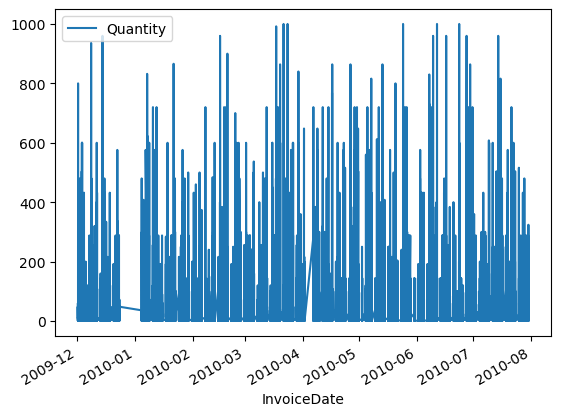

In [92]:
#check semi-annual trend
data[(data.InvoiceDate <= '2010-7-31') & (data.Quantity <= 1000) & (data.Quantity > 0)].plot(x='InvoiceDate', y='Quantity', kind = 'line')

<Axes: xlabel='InvoiceDate'>

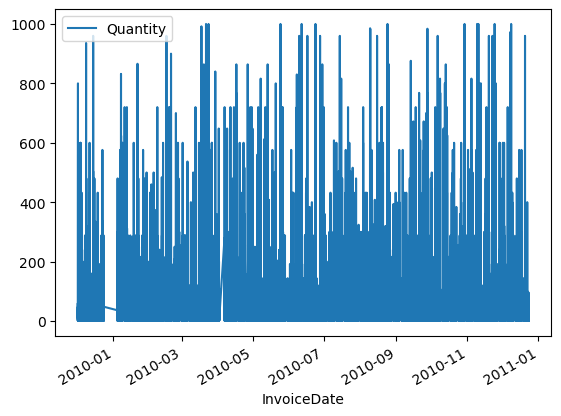

In [93]:
#check annual trend
data[(data.InvoiceDate <= '2010-12-31') & (data.Quantity <= 1000) & (data.Quantity > 0)].plot(x='InvoiceDate', y='Quantity', kind = 'line')

In [16]:
#group data using 6 months period
semi_q = data[data.InvoiceDate <= '2010-06-30'].groupby('Description')['Quantity'].sum().reset_index()

#drop minus quantity
semi_q.drop(semi_q[semi_q.Quantity < 0].index, inplace=True)

#divide the quantity by the number of days
semi_q.loc[:,'Quantity'] = semi_q.Quantity / len(data[data.InvoiceDate <= '2010-06-30'].Date.unique())

#check the consumption rate per day
semi_q.head()

,Description,Quantity
0,3 STRIPEY MICE FELTCRAFT,9.48
1,ANIMAL STICKERS,5.67
2,BLACK PIRATE TREASURE CHEST,1.43
3,BROWN PIRATE TREASURE CHEST,1.20
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.87


In [17]:
#group data using 6 months period
semi_v = data[data.InvoiceDate <= '2010-06-30'].groupby('Description')['Value'].sum().reset_index()

#drop minus value
semi_v.drop(semi_v[semi_v.Value < 0].index, inplace=True)

#divide the value by the number of days
semi_v.loc[:,'Value'] = semi_v.Value / len(data[data.InvoiceDate <= '2010-06-30'].Date.unique())

#check the consumption rate per day
semi_v.head()

,Description,Value
0,3 STRIPEY MICE FELTCRAFT,17.22
1,ANIMAL STICKERS,1.18
2,BLACK PIRATE TREASURE CHEST,2.32
3,BROWN PIRATE TREASURE CHEST,1.95
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.14


In [18]:
#group data using one year period
ann_q = data[data.InvoiceDate <= '2010-12-31'].groupby('Description')['Quantity'].sum().reset_index()

#drop minus quantity
ann_q.drop(ann_q[ann_q.Quantity <= 0].index, inplace=True)

#divide the quantity by the number of days
ann_q.loc[:,'Quantity'] = ann_q.Quantity / len(data[data.InvoiceDate <= '2010-12-31'].Date.unique())

#check result
ann_q.head()

,Description,Quantity
0,3 STRIPEY MICE FELTCRAFT,13.21
1,ANIMAL STICKERS,6.76
2,BLACK PIRATE TREASURE CHEST,1.64
3,BROWN PIRATE TREASURE CHEST,1.36
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.29


In [19]:
#group data using one year period
ann_v = data[data.InvoiceDate <= '2010-12-31'].groupby('Description')['Value'].sum().reset_index()

#drop minus value
ann_v.drop(ann_v[ann_v.Value <= 0].index, inplace=True)

#divide the quantity by the number of days
ann_v.loc[:,'Value'] = ann_v.Value / len(data[data.InvoiceDate <= '2010-12-31'].Date.unique())

#check result
ann_v.head()

,Description,Value
0,3 STRIPEY MICE FELTCRAFT,23.59
1,ANIMAL STICKERS,1.42
2,BLACK PIRATE TREASURE CHEST,2.68
3,BROWN PIRATE TREASURE CHEST,2.20
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,0.98


In [20]:
#group data using 2 year period
bin_q = data[data.InvoiceDate <= '2011-12-31'].groupby('Description')['Quantity'].sum().reset_index()

#drop minus quantity
bin_q.drop(bin_q[bin_q.Quantity <= 0].index, inplace=True)

#divide total quantity with number of days
bin_q.loc[:,'Quantity'] = bin_q.Quantity / len(data[data.InvoiceDate <= '2011-12-31'].Date.unique())

#check result
bin_q.head()

,Description,Quantity
0,3 STRIPEY MICE FELTCRAFT,11.41
1,50'S CHRISTMAS GIFT BAG LARGE,3.16
2,ANIMAL STICKERS,6.35
3,BLACK PIRATE TREASURE CHEST,1.55
4,BROWN PIRATE TREASURE CHEST,1.06


In [21]:
#group data using 2 year period
bin_v = data[data.InvoiceDate <= '2011-12-31'].groupby('Description')['Value'].sum().reset_index()

#drop minus value
bin_v.drop(bin_v[bin_v.Value <= 0].index, inplace=True)

#divide total quantity with number of days
bin_v.loc[:,'Value'] = bin_v.Value / len(data[data.InvoiceDate <= '2011-12-31'].Date.unique())

#check result
bin_v.head()

,Description,Value
0,3 STRIPEY MICE FELTCRAFT,20.75
1,50'S CHRISTMAS GIFT BAG LARGE,3.81
2,ANIMAL STICKERS,1.33
3,BLACK PIRATE TREASURE CHEST,2.20
4,BROWN PIRATE TREASURE CHEST,1.52


## Checkpoint

In [22]:
semi_q.to_excel('semi quantity.xlsx', index=False)

ann_q.to_excel('annual quantity.xlsx', index=False)

bin_q.to_excel('bienn quantity.xlsx', index=False)

semi_v.to_excel('semi value.xlsx', index=False)

ann_v.to_excel('annual value.xlsx', index=False)

bin_v.to_excel('bienn value.xlsx', index=False)

In [2]:
semi_q = pd.read_excel('semi quantity.xlsx')
ann_q = pd.read_excel('annual quantity.xlsx')
bin_q = pd.read_excel('bienn quantity.xlsx')

semi_v = pd.read_excel('semi value.xlsx')
ann_v = pd.read_excel('annual value.xlsx')
bin_v = pd.read_excel('bienn value.xlsx')

In [24]:
semi_q.head()

,Description,Quantity
0,3 STRIPEY MICE FELTCRAFT,9.48
1,ANIMAL STICKERS,5.67
2,BLACK PIRATE TREASURE CHEST,1.43
3,BROWN PIRATE TREASURE CHEST,1.20
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.87


In [25]:
bin_v.head()

,Description,Value
0,3 STRIPEY MICE FELTCRAFT,20.75
1,50'S CHRISTMAS GIFT BAG LARGE,3.81
2,ANIMAL STICKERS,1.33
3,BLACK PIRATE TREASURE CHEST,2.20
4,BROWN PIRATE TREASURE CHEST,1.52


In [4]:
#number of items in each period
print("The number of items for 6-month period is %d items" % (len(semi_q)))
print("The number of items for 1-year period is %d items" % (len(ann_q)))
print("The number of items for 2-year period is %d items" % (len(bin_q)))

The number of items for 6-month period is 3586 items
The number of items for 1-year period is 3975 items
The number of items for 2-year period is 4574 items


## Data Processing

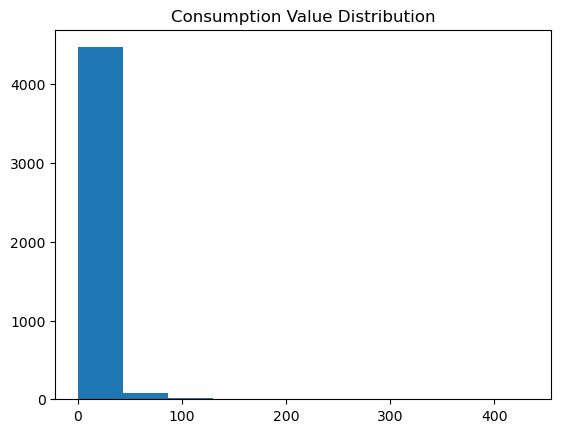

In [36]:
#distribution of consumption value
plt.hist(bin_v.Value)
plt.title('Consumption Value Distribution')
plt.show();

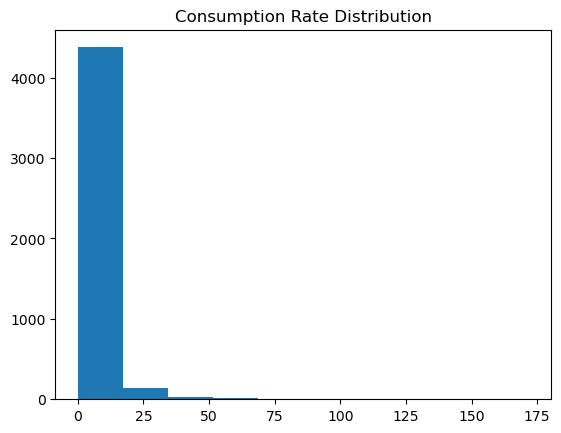

In [35]:
#distribution of consumption rate
plt.hist(bin_q.Quantity)
plt.title('Consumption Rate Distribution')
plt.show();

### semi_q quantity

In [3]:
#kmeans model
kmeans = KMeans(n_clusters = 3, n_init = 'auto', max_iter = 500, random_state = 1)

kmeans

KMeans(max_iter=500, n_clusters=3, n_init='auto', random_state=1)

In [12]:
#extract the value of the consumption rate as numpy array
X = semi_q[['Quantity']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
semi_q['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
semi_q.head()

,Description,Quantity,ClusterK,FSN
0,3 STRIPEY MICE FELTCRAFT,9.476190,0,S
1,ANIMAL STICKERS,5.666667,0,S
2,BLACK PIRATE TREASURE CHEST,1.434524,0,N
3,BROWN PIRATE TREASURE CHEST,1.196429,0,N
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.869048,0,N


Text(0.5, 1.0, 'Consumption Rate Cluster 6-months')

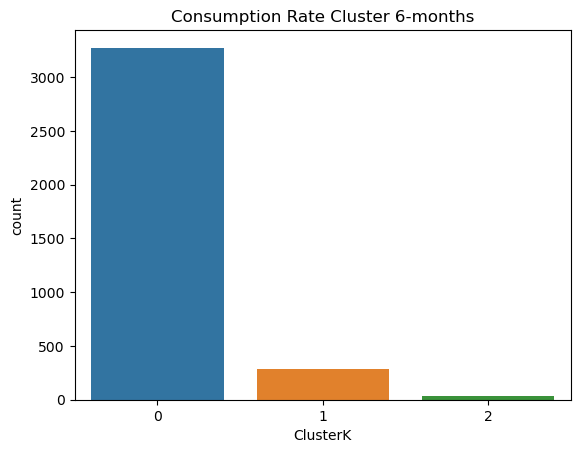

In [91]:
#visualize the clusters
sns.countplot(data=semi_q, x='ClusterK')
plt.title('Consumption Rate Cluster 6-months')

In [93]:
#print centroids
print(centroids)

[[ 2.0227514 ]
 [23.07746538]
 [96.91011905]]


In [13]:
#create dictionary to change the cluster label
fsn_dict = {0:'N', 1:'S', 2:'F'}

#value counts for the cluster
semi_q.loc[:,'ClusterK'] = semi_q.ClusterK.map(fsn_dict)

#Cluster value counts
semi_q.ClusterK.value_counts()

ClusterK
N    3273
S     283
F      30
Name: count, dtype: int64

### semi_q hier

In [6]:
#extract the value of the consumption rate as numpy array
X = semi_q[['Quantity']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
semi_q['ClusterH'] = y

#check data
semi_q.head()

,Description,Quantity,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,9.476190,N,1
1,ANIMAL STICKERS,5.666667,N,1
2,BLACK PIRATE TREASURE CHEST,1.434524,N,1
3,BROWN PIRATE TREASURE CHEST,1.196429,N,1
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.869048,N,1


Text(0.5, 1.0, 'Consumption Value Cluster 6-months')

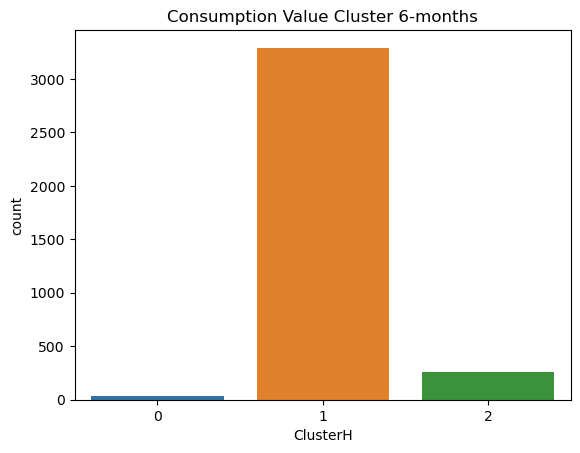

In [113]:
#visualize the clusters
sns.countplot(data=semi_q, x='ClusterH')
plt.title('Consumption Quantity Cluster 6-months')

In [7]:
#create dictionary to change the cluster label
fsn_dict = {1:'N', 2:'S', 0:'F'}

#value counts for the cluster
semi_q.loc[:,'ClusterH'] = semi_q.ClusterH.map(fsn_dict)

#Cluster value counts
semi_q.ClusterH.value_counts()

ClusterH
N    3291
S     258
F      37
Name: count, dtype: int64

### semi_v kmeans

In [14]:
#extract the value of the consumption rate as numpy array
X = semi_v[['Value']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
semi_v['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
semi_v.head()

,Description,Value,ClusterK,ABC
0,3 STRIPEY MICE FELTCRAFT,17.217857,0,A
1,ANIMAL STICKERS,1.182857,0,C
2,BLACK PIRATE TREASURE CHEST,2.324107,0,C
3,BROWN PIRATE TREASURE CHEST,1.945536,0,C
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.143810,0,C


In [108]:
#print centroids
print(centroids)

[[  3.9867636 ]
 [226.69416667]
 [ 50.34400983]]


In [15]:
#create dictionary to change the cluster label
abc_dict = {0:'C', 1:'A', 2:'B'}

#value counts for the cluster
semi_v.loc[:,'ClusterK'] = semi_v.ClusterK.map(abc_dict)

#Cluster value counts
semi_v.ClusterK.value_counts()

ClusterK
C    3400
B     178
A       7
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumption Value Cluster 6-months')

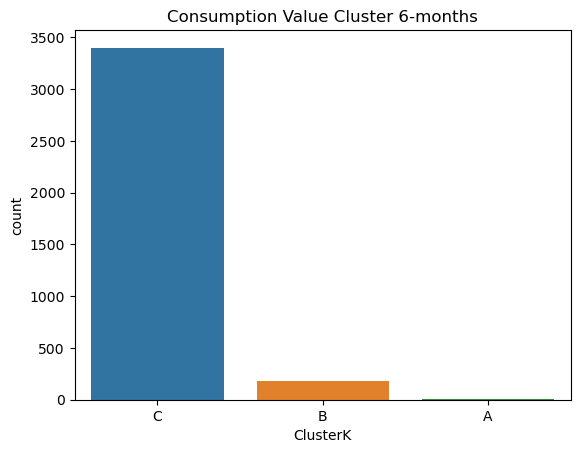

In [110]:
#visualize the clusters
sns.countplot(data=semi_v, x='ClusterK')
plt.title('Consumption Value Cluster 6-months')

### semi_v hier

In [10]:
#extract the value of the consumption rate as numpy array
X = semi_v[['Value']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
semi_v['ClusterH'] = y


#check data
semi_v.head()

,Description,Value,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,17.217857,C,1
1,ANIMAL STICKERS,1.182857,C,1
2,BLACK PIRATE TREASURE CHEST,2.324107,C,1
3,BROWN PIRATE TREASURE CHEST,1.945536,C,1
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.143810,C,1


Text(0.5, 1.0, 'Consumption Value Cluster 6-months')

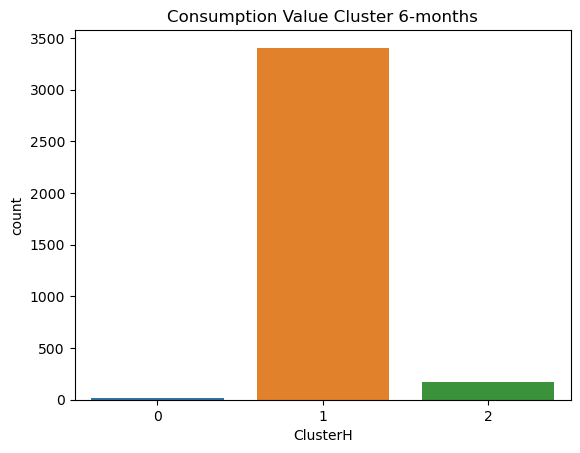

In [116]:
#visualize the clusters
sns.countplot(data=semi_v, x='ClusterH')
plt.title('Consumption Value Cluster 6-months')

In [11]:
#create dictionary to change the cluster label
abc_dict = {1:'C', 0:'A', 2:'B'}

#value counts for the cluster
semi_v.loc[:,'ClusterH'] = semi_v.ClusterH.map(abc_dict)

#Cluster value counts
semi_v.ClusterH.value_counts()

ClusterH
C    3406
B     167
A      12
Name: count, dtype: int64

### ann_q kmeans

In [12]:
#extract the value of the consumption rate as numpy array
X = ann_q[['Quantity']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
ann_q['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
ann_q.head()

,Description,Quantity,ClusterK
0,3 STRIPEY MICE FELTCRAFT,13.210031,0
1,ANIMAL STICKERS,6.761755,0
2,BLACK PIRATE TREASURE CHEST,1.639498,0
3,BROWN PIRATE TREASURE CHEST,1.360502,0
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.288401,0


In [123]:
#print centroids
print(centroids)

[[  2.38505202]
 [ 30.87453849]
 [143.50121909]]


In [13]:
#create dictionary to change the cluster label
fsn_dict = {0:'N', 1:'S', 2:'F'}

#value counts for the cluster
ann_q.loc[:,'ClusterK'] = ann_q.ClusterK.map(fsn_dict)

#Cluster value counts
ann_q.ClusterK.value_counts()

ClusterK
N    3741
S     225
F       9
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumption Rate Cluster 1-year')

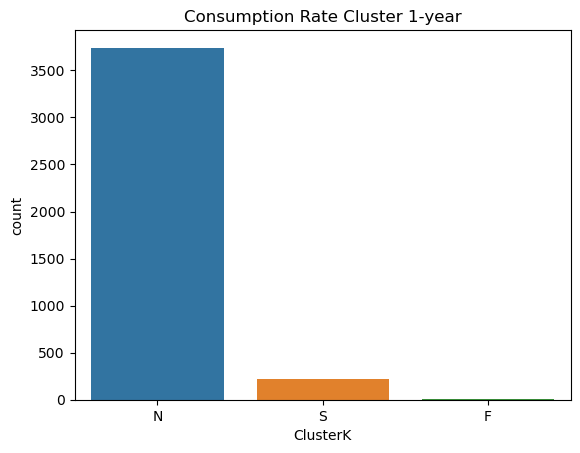

In [127]:
#visualize the clusters
sns.countplot(data=ann_q, x='ClusterK')
plt.title('Consumption Rate Cluster 1-year')

### ann_q hier

In [14]:
#extract the value of the consumption rate as numpy array
X = ann_q[['Quantity']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
ann_q['ClusterH'] = y

#check data
ann_q.head()

,Description,Quantity,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,13.210031,N,1
1,ANIMAL STICKERS,6.761755,N,2
2,BLACK PIRATE TREASURE CHEST,1.639498,N,2
3,BROWN PIRATE TREASURE CHEST,1.360502,N,2
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.288401,N,2


Text(0.5, 1.0, 'Consumption Rate Cluster 1-year')

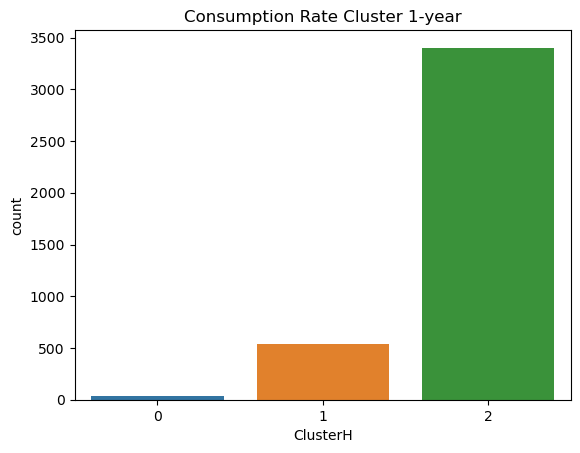

In [148]:
#visualize the clusters
sns.countplot(data=ann_q, x='ClusterH')
plt.title('Consumption Rate Cluster 1-year')

In [15]:
#create dictionary to change the cluster label
fsn_dict = {2:'N', 1:'S', 0:'F'}

#value counts for the cluster
ann_q.loc[:,'ClusterH'] = ann_q.ClusterH.map(fsn_dict)

#Cluster value counts
ann_q.ClusterH.value_counts()

ClusterH
N    3402
S     537
F      36
Name: count, dtype: int64

### ann_v kmeans

In [16]:
#extract the value of the consumption rate as numpy array
X = ann_v[['Value']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
ann_v['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
ann_v.head()

,Description,Value,ClusterK
0,3 STRIPEY MICE FELTCRAFT,23.587774,0
1,ANIMAL STICKERS,1.416207,0
2,BLACK PIRATE TREASURE CHEST,2.682602,0
3,BROWN PIRATE TREASURE CHEST,2.199687,0
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,0.982476,0


In [129]:
#print centroids
print(centroids)

[[  3.89165149]
 [ 50.97870686]
 [356.97195141]]


In [17]:
#create dictionary to change the cluster label
abc_dict = {0:'C', 1:'B', 2:'A'}

#value counts for the cluster
ann_v.loc[:,'ClusterK'] = ann_v.ClusterK.map(abc_dict)

#Cluster value counts
ann_v.ClusterK.value_counts()

ClusterK
C    3753
B     219
A       4
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumption Value Cluster 1-year')

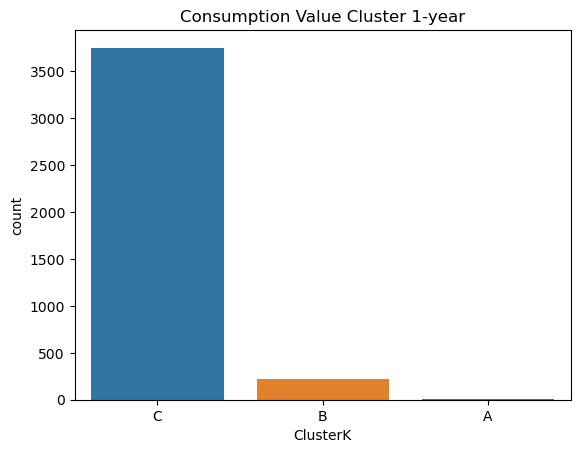

In [131]:
#visualize the clusters
sns.countplot(data=ann_v, x='ClusterK')
plt.title('Consumption Value Cluster 1-year')

### ann_v hier

In [18]:
#extract the value of the consumption rate as numpy array
X = ann_v[['Value']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
ann_v['ClusterH'] = y

#check data
ann_v.head()

,Description,Value,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,23.587774,C,0
1,ANIMAL STICKERS,1.416207,C,0
2,BLACK PIRATE TREASURE CHEST,2.682602,C,0
3,BROWN PIRATE TREASURE CHEST,2.199687,C,0
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,0.982476,C,0


Text(0.5, 1.0, 'Consumption Value Cluster 1-year')

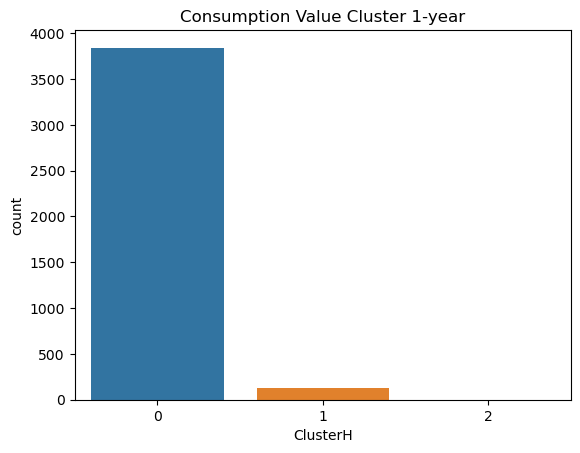

In [151]:
#visualize the clusters
sns.countplot(data=ann_v, x='ClusterH')
plt.title('Consumption Value Cluster 1-year')

In [19]:
#create dictionary to change the cluster label
abc_dict = {0:'C', 1:'B', 2:'A'}

#value counts for the cluster
ann_v.loc[:,'ClusterH'] = ann_v.ClusterH.map(abc_dict)

#Cluster value counts
ann_v.ClusterH.value_counts()

ClusterH
C    3841
B     133
A       2
Name: count, dtype: int64

### bin_q kmeans

In [20]:
#extract the value of the consumption rate as numpy array
X = bin_q[['Quantity']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
bin_q['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
bin_q.head()

,Description,Quantity,ClusterK
0,3 STRIPEY MICE FELTCRAFT,11.407285,0
1,50'S CHRISTMAS GIFT BAG LARGE,3.157285,0
2,ANIMAL STICKERS,6.350993,0
3,BLACK PIRATE TREASURE CHEST,1.552980,0
4,BROWN PIRATE TREASURE CHEST,1.061258,0


In [121]:
#print centroids
print(centroids)

[[  2.07023601]
 [ 26.6608585 ]
 [129.5272259 ]]


In [21]:
#create dictionary to change the cluster label
fsn_dict = {0:'N', 1:'S', 2:'F'}

#value counts for the cluster
bin_q.loc[:,'ClusterK'] = bin_q.ClusterK.map(fsn_dict)

#Cluster value counts
bin_q.ClusterK.value_counts()

ClusterK
N    4318
S     247
F       9
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumption Rate Cluster 2-year')

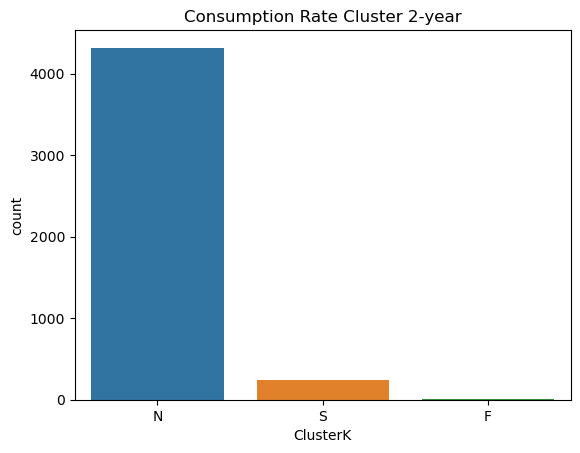

In [126]:
#visualize the clusters
sns.countplot(data=bin_q, x='ClusterK')
plt.title('Consumption Rate Cluster 2-year')

### bin_q hier

In [22]:
#extract the value of the consumption rate as numpy array
X = bin_q[['Quantity']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
bin_q['ClusterH'] = y

#check data
bin_q.head()

,Description,Quantity,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,11.407285,N,1
1,50'S CHRISTMAS GIFT BAG LARGE,3.157285,N,2
2,ANIMAL STICKERS,6.350993,N,2
3,BLACK PIRATE TREASURE CHEST,1.552980,N,2
4,BROWN PIRATE TREASURE CHEST,1.061258,N,2


Text(0.5, 1.0, 'Consumption Rate Cluster 2-year')

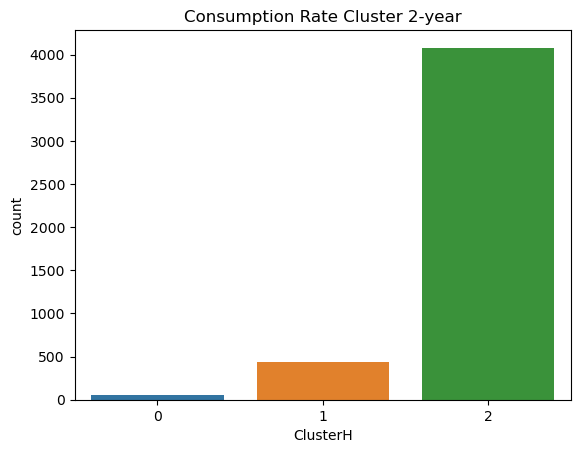

In [154]:
#visualize the clusters
sns.countplot(data=bin_q, x='ClusterH')
plt.title('Consumption Rate Cluster 2-year')

In [23]:
#create dictionary to change the cluster label
fsn_dict = {2:'N', 1:'S', 0:'F'}

#value counts for the cluster
bin_q.loc[:,'ClusterH'] = bin_q.ClusterH.map(fsn_dict)

#Cluster value counts
bin_q.ClusterH.value_counts()

ClusterH
N    4079
S     440
F      55
Name: count, dtype: int64

### bin_v kmeans

In [24]:
#extract the value of the consumption rate as numpy array
X = bin_v[['Value']].values

#produce the cluster using fit & predict
y = kmeans.fit_predict(X)

#add the cluster to the original dataset
bin_v['ClusterK'] = y

#save cluster centroids
centroids = kmeans.cluster_centers_

#check data
bin_v.head()

,Description,Value,ClusterK
0,3 STRIPEY MICE FELTCRAFT,20.749834,2
1,50'S CHRISTMAS GIFT BAG LARGE,3.807533,2
2,ANIMAL STICKERS,1.331722,2
3,BLACK PIRATE TREASURE CHEST,2.200033,2
4,BROWN PIRATE TREASURE CHEST,1.524884,2


In [133]:
#print centroids
print(centroids)

[[ 47.88117974]
 [326.90957368]
 [  3.40595026]]


In [25]:
#create dictionary to change the cluster label
abc_dict = {0:'B', 1:'A', 2:'C'}

#value counts for the cluster
bin_v.loc[:,'ClusterK'] = bin_v.ClusterK.map(abc_dict)

#Cluster value counts
bin_v.ClusterK.value_counts()

ClusterK
C    4341
B     230
A       4
Name: count, dtype: int64

Text(0.5, 1.0, 'Consumption Value Cluster 2-year')

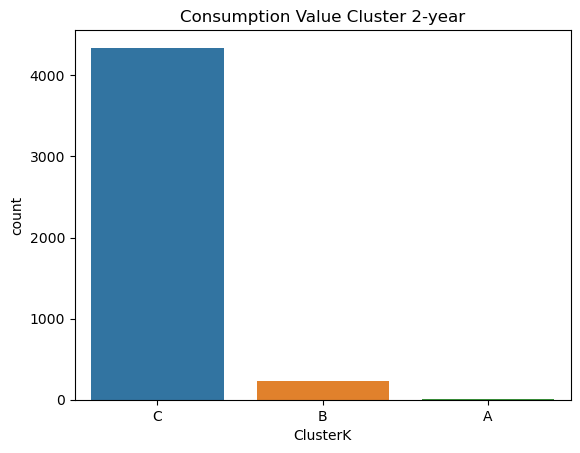

In [135]:
#visualize the clusters
sns.countplot(data=bin_v, x='ClusterK')
plt.title('Consumption Value Cluster 2-year')

### bin_v hier

In [26]:
#extract the value of the consumption rate as numpy array
X = bin_v[['Value']].values

#produce the cluster using fit & predict
y = h_cluster.fit_predict(X)

#add the cluster to the original dataset
bin_v['ClusterH'] = y

#check data
bin_v.head()

,Description,Value,ClusterK,ClusterH
0,3 STRIPEY MICE FELTCRAFT,20.749834,C,0
1,50'S CHRISTMAS GIFT BAG LARGE,3.807533,C,0
2,ANIMAL STICKERS,1.331722,C,0
3,BLACK PIRATE TREASURE CHEST,2.200033,C,0
4,BROWN PIRATE TREASURE CHEST,1.524884,C,0


Text(0.5, 1.0, 'Consumption Value Cluster 2-year')

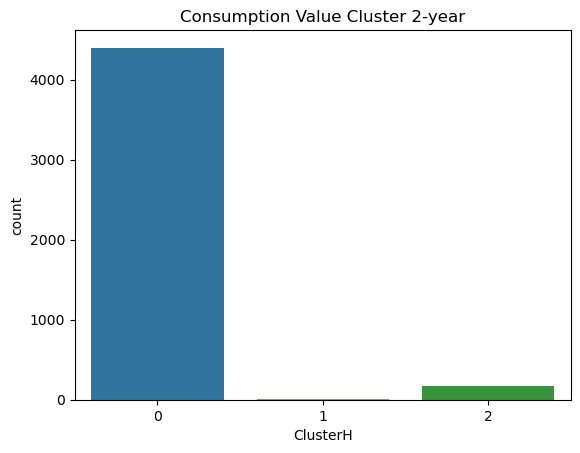

In [157]:
#visualize the clusters
sns.countplot(data=bin_v, x='ClusterH')
plt.title('Consumption Value Cluster 2-year')

In [27]:
#create dictionary to change the cluster label
abc_dict = {2:'B', 1:'A', 0:'C'}

#value counts for the cluster
bin_v.loc[:,'ClusterH'] = bin_v.ClusterH.map(abc_dict)

#Cluster value counts
bin_v.ClusterH.value_counts()

ClusterH
C    4399
B     171
A       5
Name: count, dtype: int64

### summary statistic

#### summ kmeans

In [28]:
#summary of semi quantity
summ = semi_q.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_q.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_q.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_q = summ[['ClusterK', '6-months']]
summary_q['1-year'] = summ2['Percent']
summary_q['2-year'] = summ3['Percent']

In [29]:
#print the summary
summary_q

,ClusterK,6-months,1-year,2-year
0,F,0.836587,0.226415,0.196764
1,N,91.271612,94.113208,94.403148
2,S,7.891801,5.660377,5.400087


In [30]:
#summary of semi value
summ = semi_v.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual value
summ2 = ann_v.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn value
summ3 = bin_v.groupby('ClusterK')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_v = summ[['ClusterK', '6-months']]
summary_v['1-year'] = summ2['Percent']
summary_v['2-year'] = summ3['Percent']

In [146]:
#print the summary
summary_v

,ClusterK,6-months,1-year,2-year
0,A,0.20,0.10,0.09
1,B,4.97,5.51,5.03
2,C,94.84,94.39,94.89


#### summ hier

In [31]:
#summary of semi quantity
summ = semi_q.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_q.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_q.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_qh = summ[['ClusterH', '6-months']]
summary_qh['1-year'] = summ2['Percent']
summary_qh['2-year'] = summ3['Percent']

#print the summary
summary_qh

,ClusterH,6-months,1-year,2-year
0,F,1.031790,0.905660,1.202449
1,N,91.773564,85.584906,89.177962
2,S,7.194646,13.509434,9.619589


In [32]:
#summary of semi value
summ = semi_v.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual value
summ2 = ann_v.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn value
summ3 = bin_v.groupby('ClusterH')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_vh = summ[['ClusterH', '6-months']]
summary_vh['1-year'] = summ2['Percent']
summary_vh['2-year'] = summ3['Percent']

#print the summary
summary_vh

,ClusterH,6-months,1-year,2-year
0,A,0.334728,0.050302,0.109290
1,B,4.658298,3.345070,3.737705
2,C,95.006974,96.604628,96.153005


## ABC

### semi_v

In [16]:
#new dataframe for the calculation
semi_abc = semi_v[['Description', 'Value']]

#sort value in desc order
semi_abc = semi_abc.sort_values('Value', ascending=False)

#adding cumulative sum
semi_abc['CumSum'] = semi_abc['Value'].cumsum()

#adding cumulative percent
semi_abc['CumPer'] = (semi_abc['CumSum']/semi_abc.Value.sum()) * 100

#check data
semi_abc.head()

,Description,Value,CumSum,CumPer
3426,WHITE HANGING HEART T-LIGHT HOLDER,494.521607,494.521607,2.051694
1656,JUMBO BAG RED WHITE SPOTTY,256.797321,751.318929,3.117106
2602,REGENCY CAKESTAND 3 TIER,239.400000,990.718929,4.110340
199,ASSORTED COLOUR BIRD ORNAMENT,165.845833,1156.564762,4.798409
2141,PARTY BUNTING,146.089881,1302.654643,5.404513


In [17]:
#create if function for the grouping
def condition(x):
    if x < 71:
        return 'A'
    elif x < 91:
        return 'B'
    else:
        return 'C'

#apply function to the data    
semi_abc['ABC'] = semi_abc.CumPer.apply(condition)

#check data
semi_abc

,Description,Value,CumSum,CumPer,ABC
3426,WHITE HANGING HEART T-LIGHT HOLDER,494.521607,494.521607,2.051694,A
1656,JUMBO BAG RED WHITE SPOTTY,256.797321,751.318929,3.117106,A
2602,REGENCY CAKESTAND 3 TIER,239.400000,990.718929,4.110340,A
199,ASSORTED COLOUR BIRD ORNAMENT,165.845833,1156.564762,4.798409,A
2141,PARTY BUNTING,146.089881,1302.654643,5.404513,A
...,...,...,...,...,...
3025,SILVER WINE GOBLET,0.000000,24103.089167,100.000000,C
3184,SWEETHEART CREAM STEEL FOLDIN CHAIR,0.000000,24103.089167,100.000000,C
1812,LUNCHBOX I LOVE LONDON,0.000000,24103.089167,100.000000,C
1962,MULTICOLOUR FEATHERS CURTAIN,0.000000,24103.089167,100.000000,C


In [18]:
#create new dataframe for the dictionary
df = semi_abc[['Description', 'ABC']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.ABC.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
semi_v['ABC'] = semi_v.Description.map(dfdict)

#check data
semi_v.head()

,Description,Value,ClusterK,ABC
0,3 STRIPEY MICE FELTCRAFT,17.217857,C,A
1,ANIMAL STICKERS,1.182857,C,C
2,BLACK PIRATE TREASURE CHEST,2.324107,C,C
3,BROWN PIRATE TREASURE CHEST,1.945536,C,C
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.143810,C,C


<Axes: xlabel='ABC', ylabel='count'>

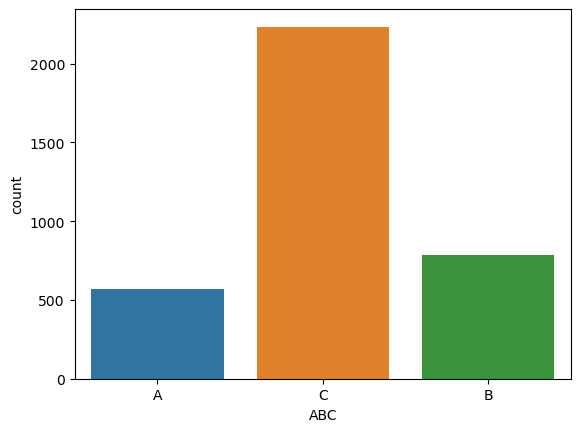

In [169]:
#counplot of ABC
sns.countplot(data=semi_v, x='ABC')

### ann_v

In [36]:
#new dataframe for the calculation
ann_abc = ann_v[['Description', 'Value']]

#sort value in desc order
ann_abc = ann_abc.sort_values('Value', ascending=False)

#adding cumulative sum
ann_abc['CumSum'] = ann_abc['Value'].cumsum()

#adding cumulative percent
ann_abc['CumPer'] = (ann_abc['CumSum']/ann_abc.Value.sum()) * 100

#check data
ann_abc.head()

,Description,Value,CumSum,CumPer
3801,WHITE HANGING HEART T-LIGHT HOLDER,477.873386,477.873386,1.757043
2900,REGENCY CAKESTAND 3 TIER,456.091223,933.964608,3.433997
1865,JUMBO BAG RED WHITE SPOTTY,270.865674,1204.830282,4.429915
230,ASSORTED COLOUR BIRD ORNAMENT,223.057524,1427.887806,5.250052
1097,DOOR MAT UNION FLAG,131.683636,1559.571442,5.734226


In [37]:
#create if function for the grouping
def condition(x):
    if x < 71:
        return 'A'
    elif x < 91:
        return 'B'
    else:
        return 'C'

#apply function to the data    
ann_abc['ABC'] = ann_abc.CumPer.apply(condition)

#check data
ann_abc

,Description,Value,CumSum,CumPer,ABC
3801,WHITE HANGING HEART T-LIGHT HOLDER,4.778734e+02,477.873386,1.757043,A
2900,REGENCY CAKESTAND 3 TIER,4.560912e+02,933.964608,3.433997,A
1865,JUMBO BAG RED WHITE SPOTTY,2.708657e+02,1204.830282,4.429915,A
230,ASSORTED COLOUR BIRD ORNAMENT,2.230575e+02,1427.887806,5.250052,A
1097,DOOR MAT UNION FLAG,1.316836e+02,1559.571442,5.734226,A
...,...,...,...,...,...
3310,"SILICON CUBE 25W, BLUE",1.316614e-03,27197.589091,99.999987,C
1723,HAPPY BIRTHDAY GINGER CAT CARD,1.191223e-03,27197.590282,99.999991,C
2575,PINK HEART CHRISTMAS DECORATION,1.191223e-03,27197.591473,99.999996,C
759,CHAMPAGNE TRAY BLANK CARD,1.191223e-03,27197.592665,100.000000,C


In [38]:
#create new dataframe for the dictionary
df = ann_abc[['Description', 'ABC']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.ABC.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
ann_v['ABC'] = ann_v.Description.map(dfdict)

#check data
ann_v.head()

,Description,Value,ClusterK,ClusterH,ABC
0,3 STRIPEY MICE FELTCRAFT,23.587774,C,C,A
1,ANIMAL STICKERS,1.416207,C,C,C
2,BLACK PIRATE TREASURE CHEST,2.682602,C,C,C
3,BROWN PIRATE TREASURE CHEST,2.199687,C,C,C
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,0.982476,C,C,C


### bin_v

In [39]:
#new dataframe for the calculation
bin_abc = bin_v[['Description', 'Value']]

#sort value in desc order
bin_abc = bin_abc.sort_values('Value', ascending=False)

#adding cumulative sum
bin_abc['CumSum'] = bin_abc['Value'].cumsum()

#adding cumulative percent
bin_abc['CumPer'] = (bin_abc['CumSum']/bin_abc.Value.sum()) * 100

#check data
bin_abc.head()

,Description,Value,CumSum,CumPer
3267,REGENCY CAKESTAND 3 TIER,433.078477,433.078477,1.597749
4363,WHITE HANGING HEART T-LIGHT HOLDER,394.329735,827.408212,3.052543
2098,JUMBO BAG RED WHITE SPOTTY,274.951175,1102.359387,4.066915
256,ASSORTED COLOUR BIRD ORNAMENT,205.278907,1307.638295,4.824247
2744,PARTY BUNTING,169.150795,1476.789089,5.448293


In [40]:
#create if function for the grouping
def condition(x):
    if x < 71:
        return 'A'
    elif x < 91:
        return 'B'
    else:
        return 'C'

#apply function to the data    
bin_abc['ABC'] = bin_abc.CumPer.apply(condition)

#check data
bin_abc

,Description,Value,CumSum,CumPer,ABC
3267,REGENCY CAKESTAND 3 TIER,4.330785e+02,433.078477,1.597749,A
4363,WHITE HANGING HEART T-LIGHT HOLDER,3.943297e+02,827.408212,3.052543,A
2098,JUMBO BAG RED WHITE SPOTTY,2.749512e+02,1102.359387,4.066915,A
256,ASSORTED COLOUR BIRD ORNAMENT,2.052789e+02,1307.638295,4.824247,A
2744,PARTY BUNTING,1.691508e+02,1476.789089,5.448293,A
...,...,...,...,...,...
1547,FOLKART HEART CHRISTMAS DECORATIONS,2.069536e-03,27105.537070,99.999990,C
2620,OWLS CHARLOTTE BAG,1.407285e-03,27105.538477,99.999995,C
2918,PINK HEART CHRISTMAS DECORATION,6.291391e-04,27105.539106,99.999998,C
1905,HAPPY BIRTHDAY GINGER CAT CARD,6.291391e-04,27105.539735,100.000000,C


In [41]:
#create new dataframe for the dictionary
df = bin_abc[['Description', 'ABC']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.ABC.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
bin_v['ABC'] = bin_v.Description.map(dfdict)

#check data
bin_v.head()

,Description,Value,ClusterK,ClusterH,ABC
0,3 STRIPEY MICE FELTCRAFT,20.749834,C,C,A
1,50'S CHRISTMAS GIFT BAG LARGE,3.807533,C,C,B
2,ANIMAL STICKERS,1.331722,C,C,C
3,BLACK PIRATE TREASURE CHEST,2.200033,C,C,C
4,BROWN PIRATE TREASURE CHEST,1.524884,C,C,C


## FSN

### semi_q

In [19]:
#new dataframe for the calculation
semi_fsn = semi_q[['Description', 'Quantity']]

#sort value in desc order
semi_fsn = semi_fsn.sort_values('Quantity', ascending=True)

#reset dataframe index
semi_fsn = semi_fsn.reset_index(drop=True)

#adding percentage of items
semi_fsn['Percent'] = (semi_fsn.index + 1) / len(semi_fsn) * 100

#check data
semi_fsn.head()

,Description,Quantity,Percent
0,BOX OF 3 PEBBLE CANDLES,0.0,0.027886
1,SWEETHEART CREAM STEEL FOLDIN CHAIR,0.0,0.055772
2,CIRCUS PARADE LUNCHBOX,0.0,0.083659
3,BEWARE OF THE CAT DOORMAT,0.0,0.111545
4,WOODLAND CREATURES WRAP,0.0,0.139431


In [177]:
#check top 10% of data
semi_fsn[semi_fsn.Percent > 90]

,Description,Quantity,Percent
3227,PINK/BROWN DOTS RUFFLED UMBRELLA,11.39,90.02
3228,SET OF 72 PINK HEART PAPER DOILIES,11.42,90.04
3229,RED SPOT HEART HOT WATER BOTTLE,11.45,90.07
3230,DOOR MAT NEW ENGLAND,11.50,90.10
3231,SMALL RED SPOT WINDMILL,11.51,90.13
...,...,...,...
3581,WORLD WAR 2 GLIDERS ASSTD DESIGNS,136.29,99.89
3582,JUMBO BAG RED WHITE SPOTTY,146.60,99.92
3583,BLACK AND WHITE PAISLEY FLOWER MUG,152.85,99.94
3584,PACK OF 72 RETRO SPOT CAKE CASES,182.17,99.97


In [179]:
#check the lowest 60% of data
semi_fsn[semi_fsn.Percent <= 60]

,Description,Quantity,Percent
0,BOX OF 3 PEBBLE CANDLES,0.00,0.03
1,SWEETHEART CREAM STEEL FOLDIN CHAIR,0.00,0.06
2,CIRCUS PARADE LUNCHBOX,0.00,0.08
3,BEWARE OF THE CAT DOORMAT,0.00,0.11
4,WOODLAND CREATURES WRAP,0.00,0.14
...,...,...,...
2146,RIBBONS PURSE,1.77,59.87
2147,3 PIECE JIGSAW TOADSTOOLS,1.77,59.90
2148,MOTORING TISSUE BOX,1.78,59.93
2149,GLASS SPHERE CANDLE STAND LARGE,1.78,59.96


In [20]:
#create if function for the grouping
def condition(x):
    if x < 2:
        return 'N'
    elif x > 11:
        return 'F'
    else:
        return 'S'

#apply function to the data    
semi_fsn['FSN'] = semi_fsn.Quantity.apply(condition)

#check data
semi_fsn

,Description,Quantity,Percent,FSN
0,BOX OF 3 PEBBLE CANDLES,0.000000,0.027886,N
1,SWEETHEART CREAM STEEL FOLDIN CHAIR,0.000000,0.055772,N
2,CIRCUS PARADE LUNCHBOX,0.000000,0.083659,N
3,BEWARE OF THE CAT DOORMAT,0.000000,0.111545,N
4,WOODLAND CREATURES WRAP,0.000000,0.139431,N
...,...,...,...,...
3581,WORLD WAR 2 GLIDERS ASSTD DESIGNS,136.291667,99.888455,F
3582,JUMBO BAG RED WHITE SPOTTY,146.601190,99.916341,F
3583,BLACK AND WHITE PAISLEY FLOWER MUG,152.851190,99.944228,F
3584,PACK OF 72 RETRO SPOT CAKE CASES,182.172619,99.972114,F


In [21]:
#create new dataframe for the dictionary
df = semi_fsn[['Description', 'FSN']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.FSN.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
semi_q['FSN'] = semi_q.Description.map(dfdict)

#check data
semi_q.head()

,Description,Quantity,ClusterK,FSN
0,3 STRIPEY MICE FELTCRAFT,9.476190,N,S
1,ANIMAL STICKERS,5.666667,N,S
2,BLACK PIRATE TREASURE CHEST,1.434524,N,N
3,BROWN PIRATE TREASURE CHEST,1.196429,N,N
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.869048,N,N


<Axes: xlabel='FSN', ylabel='count'>

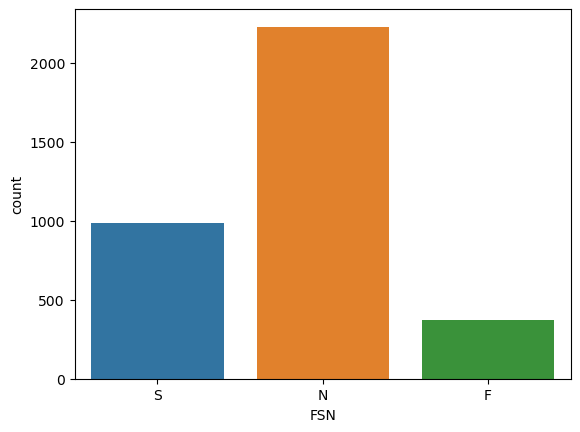

In [45]:
#counplot of ABC
sns.countplot(data=semi_q, x='FSN')

### ann_q

In [46]:
#new dataframe for the calculation
ann_fsn = ann_q[['Description', 'Quantity']]

#sort value in desc order
ann_fsn = ann_fsn.sort_values('Quantity', ascending=True)

#reset dataframe index
ann_fsn = ann_fsn.reset_index(drop=True)

#adding percentage of items
ann_fsn['Percent'] = (ann_fsn.index + 1) / len(ann_fsn) * 100

#check data
ann_fsn.head()

,Description,Quantity,Percent
0,JADE GREEN PAIR ENAMEL HAIR SLIDES,0.003135,0.025157
1,"F.FAIRY S/3 SML CANDLE, ROSE",0.003135,0.050314
2,"F.FAIRY S/3 SML CANDLE,LILY/VALLEY",0.003135,0.075472
3,AMBER CRYSTAL DROP EARRINGS,0.003135,0.100629
4,EDWARDIAN DROP EARRINGS JET BLACK,0.003135,0.125786


In [47]:
#create if function for the grouping
def condition(x):
    if x < 2:
        return 'N'
    elif x > 11:
        return 'F'
    else:
        return 'S'

#apply function to the data    
ann_fsn['FSN'] = ann_fsn.Quantity.apply(condition)

#check data
ann_fsn

,Description,Quantity,Percent,FSN
0,JADE GREEN PAIR ENAMEL HAIR SLIDES,0.003135,0.025157,N
1,"F.FAIRY S/3 SML CANDLE, ROSE",0.003135,0.050314,N
2,"F.FAIRY S/3 SML CANDLE,LILY/VALLEY",0.003135,0.075472,N
3,AMBER CRYSTAL DROP EARRINGS,0.003135,0.100629,N
4,EDWARDIAN DROP EARRINGS JET BLACK,0.003135,0.125786,N
...,...,...,...,...
3970,BROCADE RING PURSE,149.021944,99.899371,F
3971,JUMBO BAG RED WHITE SPOTTY,154.736677,99.924528,F
3972,WORLD WAR 2 GLIDERS ASSTD DESIGNS,174.510972,99.949686,F
3973,WHITE HANGING HEART T-LIGHT HOLDER,179.253918,99.974843,F


In [48]:
#create new dataframe for the dictionary
df = ann_fsn[['Description', 'FSN']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.FSN.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
ann_q['FSN'] = ann_q.Description.map(dfdict)

#check data
ann_q.head()

,Description,Quantity,ClusterK,ClusterH,FSN
0,3 STRIPEY MICE FELTCRAFT,13.210031,N,S,F
1,ANIMAL STICKERS,6.761755,N,N,S
2,BLACK PIRATE TREASURE CHEST,1.639498,N,N,N
3,BROWN PIRATE TREASURE CHEST,1.360502,N,N,N
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.288401,N,N,N


### bin_q

In [49]:
#new dataframe for the calculation
bin_fsn = bin_q[['Description', 'Quantity']]

#sort value in desc order
bin_fsn = bin_fsn.sort_values('Quantity', ascending=True)

#reset dataframe index
bin_fsn = bin_fsn.reset_index(drop=True)

#adding percentage of items
bin_fsn['Percent'] = (bin_fsn.index + 1) / len(bin_fsn) * 100

#check data
bin_fsn.head()

,Description,Quantity,Percent
0,S/6 CHRISTMAS TREE PLACE SETTING,0.001656,0.021863
1,FLOWER SHOP DESIGN MUG,0.001656,0.043725
2,"F.FAIRY S/3 SML CANDLE, LAVENDER",0.001656,0.065588
3,S/3 COLOURS FLOCK TEA TOWELS,0.001656,0.087451
4,GOLD CHRISTMAS STOCKING DECORATION,0.001656,0.109314


In [50]:
#create if function for the grouping
def condition(x):
    if x < 2:
        return 'N'
    elif x > 11:
        return 'F'
    else:
        return 'S'

#apply function to the data    
bin_fsn['FSN'] = bin_fsn.Quantity.apply(condition)

#check data
bin_fsn

,Description,Quantity,Percent,FSN
0,S/6 CHRISTMAS TREE PLACE SETTING,0.001656,0.021863,N
1,FLOWER SHOP DESIGN MUG,0.001656,0.043725,N
2,"F.FAIRY S/3 SML CANDLE, LAVENDER",0.001656,0.065588,N
3,S/3 COLOURS FLOCK TEA TOWELS,0.001656,0.087451,N
4,GOLD CHRISTMAS STOCKING DECORATION,0.001656,0.109314,N
...,...,...,...,...
4569,ASSORTED COLOUR BIRD ORNAMENT,129.082781,99.912549,F
4570,WHITE HANGING HEART T-LIGHT HOLDER,146.197020,99.934412,F
4571,PACK OF 72 RETRO SPOT CAKE CASES,147.225166,99.956275,F
4572,JUMBO BAG RED WHITE SPOTTY,152.975166,99.978137,F


In [51]:
#create new dataframe for the dictionary
df = bin_fsn[['Description', 'FSN']].dropna()
                   
#create dictionary with ABC category as values and description as key
dfdict = pd.Series(df.FSN.values,index=df.Description).to_dict()

#apply the dictionary to the original dataset
bin_q['FSN'] = bin_q.Description.map(dfdict)

#check data
bin_q.head()

,Description,Quantity,ClusterK,ClusterH,FSN
0,3 STRIPEY MICE FELTCRAFT,11.407285,N,S,F
1,50'S CHRISTMAS GIFT BAG LARGE,3.157285,N,N,S
2,ANIMAL STICKERS,6.350993,N,N,S
3,BLACK PIRATE TREASURE CHEST,1.552980,N,N,N
4,BROWN PIRATE TREASURE CHEST,1.061258,N,N,N


### summary fsn

In [52]:
#summary of semi quantity
summ = semi_q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_fsn = summ[['FSN', '6-months']]
summary_fsn['1-year'] = summ2['Percent']
summary_fsn['2-year'] = summ3['Percent']

summary_fsn

,FSN,6-months,1-year,2-year
0,F,10.401562,9.660377,7.717534
1,N,62.102621,61.484277,63.904679
2,S,27.495817,28.855346,28.377787


### summary abc

In [54]:
#summary of semi value
summ = semi_v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ['6-months'] = summ.Count / summ.Count.sum() * 100

#summary of annual value
summ2 = ann_v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn value
summ3 = bin_v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_abc = summ[['ABC', '6-months']]
summary_abc['1-year'] = summ2['Percent']
summary_abc['2-year'] = summ3['Percent']

summary_abc

,ABC,6-months,1-year,2-year
0,A,15.815900,15.442656,15.060109
1,B,21.841004,22.258551,22.732240
2,C,62.343096,62.298793,62.207650


## Checkpoint full

In [55]:
semi_q.to_excel('semi quantity.xlsx', index=False)

ann_q.to_excel('annual quantity.xlsx', index=False)

bin_q.to_excel('bienn quantity.xlsx', index=False)

semi_v.to_excel('semi value.xlsx', index=False)

ann_v.to_excel('annual value.xlsx', index=False)

bin_v.to_excel('bienn value.xlsx', index=False)

In [2]:
semi_q = pd.read_excel('semi quantity.xlsx')
ann_q = pd.read_excel('annual quantity.xlsx')
bin_q = pd.read_excel('bienn quantity.xlsx')

semi_v = pd.read_excel('semi value.xlsx')
ann_v = pd.read_excel('annual value.xlsx')
bin_v = pd.read_excel('bienn value.xlsx')

In [3]:
semi_q

,Description,Quantity,ClusterK,FSN
0,3 STRIPEY MICE FELTCRAFT,9.476190,N,S
1,ANIMAL STICKERS,5.666667,N,S
2,BLACK PIRATE TREASURE CHEST,1.434524,N,N
3,BROWN PIRATE TREASURE CHEST,1.196429,N,N
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.869048,N,N
...,...,...,...,...
3581,ZINC HEART LATTICE TRAY OVAL,1.845238,N,N
3582,ZINC METAL HEART DECORATION,41.601190,S,F
3583,ZINC POLICE BOX LANTERN,1.148810,N,N
3584,ZINC TOP 2 DOOR WOODEN SHELF,1.250000,N,N


## Reduced

In [97]:
#search top 10%, 15%, & 20% of 6-month data
print(semi_fsn[semi_fsn.Percent <= 90].tail())

print(semi_fsn[semi_fsn.Percent <= 85].tail())

print(semi_fsn[semi_fsn.Percent <= 80].tail())

                             Description   Quantity    Percent FSN
3222        SMALL HEART MEASURING SPOONS  11.184524  89.877301   F
3223       SCENTED VELVET LOUNGE CANDLE   11.232143  89.905187   F
3224  MINI CAKE STAND  HANGING STRAWBERY  11.273810  89.933073   F
3225     CERAMIC CAKE DESIGN SPOTTED MUG  11.327381  89.960959   F
3226        CITRONELLA CANDLE GARDEN POT  11.345238  89.988846   F
                            Description  Quantity    Percent FSN
3043         FAWN BLUE HOT WATER BOTTLE  7.202381  84.885666   S
3044     VINTAGE BILLBOARD DRINK ME MUG  7.220238  84.913553   S
3045  MAGNETS PACK OF 4 VINTAGE COLLAGE  7.232143  84.941439   S
3046    SAVE THE PLANET COTTON TOTE BAG  7.232143  84.969325   S
3047      PAPER BUNTING VINTAGE PAISLEY  7.279762  84.997211   S
                              Description  Quantity    Percent FSN
2863              MOODY GIRL DOOR HANGER   5.214286  79.866146   S
2864  LARGE HANGING IVORY & RED WOOD BIRD  5.220238  79.894032   S
2865   

In [158]:
#search top 10%, 15%, & 20% of 1-year data
print(ann_fsn[ann_fsn.Percent <= 90].tail())

print(ann_fsn[ann_fsn.Percent <= 85].tail())

print(ann_fsn[ann_fsn.Percent <= 80].tail())

                           Description   Quantity    Percent FSN
3586                 GIN AND TONIC MUG  10.884013  90.238994   S
3587                RED SPOTTY PEG BAG  10.887147  90.264151   S
3588     BAKING SET 9 PIECE RETROSPOT   10.896552  90.289308   S
3589     SET OF 20 KIDS COOKIE CUTTERS  10.937304  90.314465   S
3590  BLACK/BLUE DOTS RUFFLED UMBRELLA  10.974922  90.339623   S
                              Description   Quantity    Percent FSN
3572     ROSES REGENCY TEACUP AND SAUCER   10.592476  89.886792   S
3573  WOODEN HEART CHRISTMAS SCANDINAVIAN  10.605016  89.911950   S
3574    SMALL HANGING IVORY/RED WOOD BIRD  10.614420  89.937107   S
3575              20 DOLLY PEGS RETROSPOT  10.639498  89.962264   S
3576                      PINK PARTY BAGS  10.645768  89.987421   S
                         Description  Quantity    Percent FSN
3373              PACK 20 DOLLY PEGS  7.206897  84.880503   S
3374  BLUE SCANDINAVIAN PAISLEY WRAP  7.210031  84.905660   S
3375    COSY HOU

In [160]:
#search top 10%, 15%, & 20% of 2-year data
print(bin_fsn[bin_fsn.Percent <= 90].tail())

print(bin_fsn[bin_fsn.Percent <= 85].tail())

print(bin_fsn[bin_fsn.Percent <= 80].tail())

                            Description  Quantity    Percent FSN
4111  SET OF 6 SPICE TINS PANTRY DESIGN  8.844371  89.899432   S
4112             LAUNDRY 15C METAL SIGN  8.849338  89.921294   S
4113           LOVE BUILDING BLOCK WORD  8.885762  89.943157   S
4114            20 DOLLY PEGS RETROSPOT  8.894040  89.965020   S
4115       ABSTRACT CIRCLES POCKET BOOK  8.907285  89.986882   S
                             Description  Quantity    Percent FSN
3882                    BLACK WINE GLASS  5.980132  84.892873   S
3883    GLITTER HANGING BUTTERFLY STRING  5.983444  84.914735   S
3884                FELTCRAFT DOLL EMILY  5.986755  84.936598   S
3885      SKULLS PARTY BAG + STICKER SET  5.996689  84.958461   S
3886  SET/6 TURQUOISE BUTTERFLY T-LIGHTS  6.006623  84.980324   S
                              Description  Quantity    Percent FSN
3654     WHITE ROCKING HORSE HAND PAINTED  4.309603  79.908177   S
3655                REGENCY TEAPOT ROSES   4.327815  79.930039   S
3656     SET/

In [86]:
#reset dataframe index
semi_abc = semi_abc.reset_index(drop=True)
#add percent of item to abc
semi_abc['Percent'] = (semi_abc.index + 1) / len(semi_abc) * 100

#reset dataframe index
ann_abc = ann_abc.reset_index(drop=True)
#add percent of item to abc
ann_abc['Percent'] = (ann_abc.index + 1) / len(ann_abc) * 100

#reset dataframe index
bin_abc = bin_abc.reset_index(drop=True)
#add percent of item to abc
bin_abc['Percent'] = (bin_abc.index + 1) / len(bin_abc) * 100

In [182]:
#search top 10% , 15%, & 20% of 6-month data
print(semi_abc[semi_abc.Percent <= 10].iloc[:,[0,1,5]].tail())

print(semi_abc[semi_abc.Percent <= 15].iloc[:,[0,1,5]].tail())

print(semi_abc[semi_abc.Percent <= 20].iloc[:,[0,1,5]].tail())

print(semi_abc[semi_abc.Percent <= 5].iloc[:,[0,1,5]].tail())

                            Description      Value   Percent
353         SET/6 RED SPOTTY PAPER CUPS  17.504821  9.874477
354  RED HANGING METAL STAR TLIGHT HLDR  17.474107  9.902371
355  MINI CAKE STAND  HANGING STRAWBERY  17.350595  9.930265
356     GAOLERS KEYS DECORATIVE GARDEN   17.331548  9.958159
357              TWO DOOR CURIO CABINET  17.326786  9.986053
                          Description      Value    Percent
532          PACK OF 12 SKULL TISSUES  11.835417  14.867503
533              CHOCOLATE CALCULATOR  11.827679  14.895397
534          DOORSTOP RETROSPOT HEART  11.825536  14.923291
535             KENSINGTON COFFEE SET  11.794643  14.951185
536  AGED GLASS SILVER T-LIGHT HOLDER  11.781250  14.979079
                             Description     Value    Percent
712             LOVE HEART POCKET WARMER  8.405357  19.888424
713          CABIN BAG VINTAGE RETROSPOT  8.377381  19.916318
714  60 GOLD AND SILVER FAIRY CAKE CASES  8.353214  19.944212
715    SET/4 PINK ORCHID C

In [159]:
#search top 10% , 15%, & 20% of 1-year data
print(ann_abc[ann_abc.Percent <= 10].iloc[:,[0,1,5]].tail())

print(ann_abc[ann_abc.Percent <= 15].iloc[:,[0,1,5]].tail())

print(ann_abc[ann_abc.Percent <= 20].iloc[:,[0,1,5]].tail())

                            Description      Value   Percent
392        LARGE CIRCULAR MIRROR MOBILE  17.215987  9.884306
393    PACK 3 BOXES CHRISTMAS PANNETONE  17.203918  9.909457
394  SET OF 72 PINK HEART PAPER DOILIES  17.155956  9.934608
395        PACK OF 12 WOODLAND TISSUES   17.115987  9.959759
396    GLITTER HANGING BUTTERFLY STRING  17.078056  9.984909
                          Description      Value    Percent
591          VINTAGE UNION JACK APRON  11.660815  14.889336
592        TRADITIONAL KNITTING NANCY  11.649530  14.914487
593              CHOCOLATE CALCULATOR  11.608307  14.939638
594  GLASS JAR, ENGLISH CONFECTIONERY  11.557524  14.964789
595    DAIRY MAID TRADITIONAL TEAPOT   11.551097  14.989940
                           Description     Value    Percent
790               NURSE'S BAG SOFT TOY  8.410345  19.894366
791       HOOK, 1 HANGER ,MAGIC GARDEN  8.408903  19.919517
792                 PINK PADDED MOBILE  8.390282  19.944668
793  WALL MIRROR , DIAMANTE OVAL S

In [166]:
#search top 10% , 15%, & 20% of 2-year data
print(bin_abc[bin_abc.Percent <= 10].iloc[:,[0,1,5]].tail())

print(bin_abc[bin_abc.Percent <= 15].iloc[:,[0,1,5]].tail())

print(bin_abc[bin_abc.Percent <= 20].iloc[:,[0,1,5]].tail())

                            Description      Value   Percent
452    FOOD CONTAINER SET 3 LOVE HEART   14.633311  9.901639
453                    PICTURE DOMINOES  14.606689  9.923497
454                        WICKER STAR   14.585762  9.945355
455  PINK FLORAL FELTCRAFT SHOULDER BAG  14.570397  9.967213
456              REGENCY MILK JUG PINK   14.540563  9.989071
                       Description     Value    Percent
681         WOODEN REGATTA BUNTING  9.493709  14.907104
682    PACK OF 12 COLOURED PENCILS  9.450546  14.928962
683  LOVE SEAT ANTIQUE WHITE METAL  9.424669  14.950820
684       VINTAGE UNION JACK APRON  9.402798  14.972678
685        PANTRY WASHING UP BRUSH  9.401175  14.994536
                           Description     Value    Percent
910              CAKE STAND LACE WHITE  6.901904  19.912568
911   SPRING DEC , HANGING CHICK CREAM  6.886093  19.934426
912          VINTAGE BILLBOARD TEA MUG  6.870464  19.956284
913  SET OF 4 KNICK KNACK TINS LEAVES   6.859023  19.97814

### Quantity

In [106]:
#kmeans model
kmeans = KMeans(n_clusters = 3, n_init = 'auto', max_iter = 500, random_state = 1)

#hierarchical model
h_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward', compute_distances=True)

In [167]:
#create new datasets with reduced data
semi_90q = semi_q[['Description', 'Quantity']][semi_q.Quantity <= 11]
semi_85q = semi_q[['Description', 'Quantity']][semi_q.Quantity <= 7]
semi_80q = semi_q[['Description', 'Quantity']][semi_q.Quantity <= 5]

ann_90q = ann_q[['Description', 'Quantity']][ann_q.Quantity <= 11]
ann_85q = ann_q[['Description', 'Quantity']][ann_q.Quantity <= 7]
ann_80q = ann_q[['Description', 'Quantity']][ann_q.Quantity <= 5]

bin_90q = bin_q[['Description', 'Quantity']][bin_q.Quantity <= 9]
bin_85q = bin_q[['Description', 'Quantity']][bin_q.Quantity <= 6]
bin_80q = bin_q[['Description', 'Quantity']][bin_q.Quantity <= 5]

In [168]:
#list of all dataframes
df_all = [semi_90q, semi_85q, semi_80q, ann_90q, ann_85q, ann_80q, bin_90q, bin_85q, bin_80q]

#use loop to cluster all dataframes
for df in df_all:
    df.reset_index(drop=True, inplace=True) #reset dataframe index
    X = df[['Quantity']].values #extract the value as array
    y = kmeans.fit_predict(X) #create the cluster
    centroids = kmeans.cluster_centers_ #extract the centroid
    labels = kmeans.labels_ #extract cluster label
    df['Cluster'] = y #copy cluster to original data
    df['Centroid'] = [centroids[label][0] for label in labels] #add centroid to the data
    
    #calculate max & min centroid for labeling
    max_cent = df['Centroid'].max()
    min_cent = df['Centroid'].min()
    
    #change cluster label to FSN using the centroid
    df['Cluster'] = df['Centroid'].apply(lambda x: 'F' if x == max_cent else ('N' if x == min_cent else 'S'))
    #drop centroid column
    df.drop(columns=['Centroid'], inplace=True)

semi_90q.head()

,Description,Quantity,Cluster
0,3 STRIPEY MICE FELTCRAFT,9.476190,F
1,ANIMAL STICKERS,5.666667,S
2,BLACK PIRATE TREASURE CHEST,1.434524,N
3,BROWN PIRATE TREASURE CHEST,1.196429,N
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.869048,N


In [169]:
#summary of semi quantity
summ = semi_90q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_90q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_90q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_90 = summ[['Cluster', '6-month']]
summary_90['1-year'] = summ2['Percent']
summary_90['2-year'] = summ3['Percent']

#check data
summary_90

,Cluster,6-month,1-year,2-year
0,F,9.212574,9.523810,9.970888
1,N,69.872393,68.142579,65.890344
2,S,20.915033,22.333612,24.138768


In [170]:
#summary of semi quantity
summ = semi_85q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_85q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_85q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_85 = summ[['Cluster', '6-month']]
summary_85['1-year'] = summ2['Percent']
summary_85['2-year'] = summ3['Percent']

#check data
summary_85

,Cluster,6-month,1-year,2-year
0,F,12.442244,12.094132,13.76737
1,N,63.597360,63.151623,61.11683
2,S,23.960396,24.754245,25.11580


In [171]:
#summary of semi quantity
summ = semi_80q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_80q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_80q.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_80 = summ[['Cluster', '6-month']]
summary_80['1-year'] = summ2['Percent']
summary_80['2-year'] = summ3['Percent']

#check data
summary_80

,Cluster,6-month,1-year,2-year
0,F,14.376321,14.494133,15.161976
1,N,60.747005,61.021250,60.276155
2,S,24.876674,24.484618,24.561869


### Value

In [268]:
#create new datasets with reduced data for the consumptio value
semi_90v = semi_v[['Description', 'Value']][semi_v.Value <= 17]
semi_85v = semi_v[['Description', 'Value']][semi_v.Value <= 12]
semi_80v = semi_v[['Description', 'Value']][semi_v.Value <= 8]

ann_90v = semi_v[['Description', 'Value']][semi_v.Value <= 17]
ann_85v = semi_v[['Description', 'Value']][semi_v.Value <= 11]
ann_80v = semi_v[['Description', 'Value']][semi_v.Value <= 8]

bin_90v = semi_v[['Description', 'Value']][semi_v.Value <= 14]
bin_85v = semi_v[['Description', 'Value']][semi_v.Value <= 9]
bin_80v = semi_v[['Description', 'Value']][semi_v.Value <= 7]

In [269]:
#list of all dataframes
df_all = [semi_90v, semi_85v, semi_80v, ann_90v, ann_85v, ann_80v, bin_90v, bin_85v, bin_80v]

#use loop to cluster all dataframes
for df in df_all:
    df.reset_index(drop=True, inplace=True) #reset dataframe index
    X = df[['Value']].values #extract the value as array
    y = kmeans.fit_predict(X) #create the cluster
    centroids = kmeans.cluster_centers_ #extract the centroid
    labels = kmeans.labels_ #extract cluster label
    df['Cluster'] = y #copy cluster to original data
    df['Centroid'] = [centroids[label][0] for label in labels] #add centroid to the data
    
    #calculate max & min centroid for labeling
    max_cent = df['Centroid'].max()
    min_cent = df['Centroid'].min()
    
    #change cluster label to FSN using the centroid
    df['Cluster'] = df['Centroid'].apply(lambda x: 'A' if x == max_cent else ('C' if x == min_cent else 'B'))
    #drop centroid column
    df.drop(columns=['Centroid'], inplace=True)

#check data
semi_90v.head()

,Description,Value,Cluster
0,ANIMAL STICKERS,1.182857,C
1,BLACK PIRATE TREASURE CHEST,2.324107,C
2,BROWN PIRATE TREASURE CHEST,1.945536,C
3,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.143810,C
4,CHERRY BLOSSOM DECORATIVE FLASK,9.089107,A


In [196]:
#summary of semi quantity
summ = semi_90v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_90v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_90v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_90v = summ[['Cluster', '6-month']]
summary_90v['1-year'] = summ2['Percent']
summary_90v['2-year'] = summ3['Percent']

#check data
summary_90v

,Cluster,6-month,1-year,2-year
0,A,10.304159,10.304159,11.206622
1,B,21.694600,21.694600,24.068768
2,C,68.001241,68.001241,64.724610


In [197]:
#summary of semi quantity
summ = semi_85v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_85v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_85v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_85v = summ[['Cluster', '6-month']]
summary_85v['1-year'] = summ2['Percent']
summary_85v['2-year'] = summ3['Percent']

#check data
summary_85v

,Cluster,6-month,1-year,2-year
0,A,12.250898,12.782205,13.740982
1,B,23.456387,23.871182,25.042941
2,C,64.292715,63.346614,61.216077


In [198]:
#summary of semi quantity
summ = semi_80v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_80v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_80v.groupby('Cluster')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_80v = summ[['Cluster', '6-month']]
summary_80v['1-year'] = summ2['Percent']
summary_80v['2-year'] = summ3['Percent']

#check data
summary_80v

,Cluster,6-month,1-year,2-year
0,A,13.167135,13.167135,12.926652
1,B,25.140449,25.140449,25.962237
2,C,61.692416,61.692416,61.111111


### ABC

In [270]:
#list of all dataframes
df_all = [semi_90v, semi_85v, semi_80v, ann_90v, ann_85v, ann_80v, bin_90v, bin_85v, bin_80v]

#use loop to cluster all dataframes
for df in df_all:
    df.sort_values('Value', ascending=False, inplace=True) #sort value in descending order
    df2 = df[['Description', 'Value']] #create new dataset for the calculation
    df2['CumSum'] = df2['Value'].cumsum() #add cumulative sum
    df2['CumPer'] = (df2['CumSum']/df2.Value.sum()) * 100 #add cumlative percentage
    
    #apply ABC category to the dataset
    df2['ABC'] = df2['CumPer'].apply(lambda x: 'A' if x < 71 else ('B' if x < 91 else 'C'))
    df['ABC'] = df2['ABC'] #add result to the original dataset

#check data
semi_90v.head()

,Description,Value,Cluster,ABC
1034,FAIRY CAKE FLANNEL ASSORTED COLOUR,16.943750,A,A
1485,IVORY HANGING DECORATION HEART,16.864345,A,A
3112,WHITE SWEETHEARTS CABINET 4 DRAWERS,16.745536,A,A
2534,SET OF 2 FANCY FONT TEA TOWELS,16.739583,A,A
2368,RETRO SPOT CIGAR BOX MATCHES,16.729821,A,A


In [200]:
#summary of semi quantity
summ = semi_80v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_80v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_80v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_80abc = summ[['ABC', '6-month']]
summary_80abc['1-year'] = summ2['Percent']
summary_80abc['2-year'] = summ3['Percent']

#check data
summary_80abc

,ABC,6-month,1-year,2-year
0,A,28.757022,28.757022,29.411765
1,B,22.612360,22.612360,22.657952
2,C,48.630618,48.630618,47.930283


In [201]:
#summary of semi quantity
summ = semi_85v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_85v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_85v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_85abc = summ[['ABC', '6-month']]
summary_85abc['1-year'] = summ2['Percent']
summary_85abc['2-year'] = summ3['Percent']

#check data
summary_85abc

,ABC,6-month,1-year,2-year
0,A,26.951976,27.456839,28.306424
1,B,22.410977,22.443559,22.535211
2,C,50.637047,50.099602,49.158365


In [202]:
#summary of semi quantity
summ = semi_90v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_90v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_90v.groupby('ABC')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_90abc = summ[['ABC', '6-month']]
summary_90abc['1-year'] = summ2['Percent']
summary_90abc['2-year'] = summ3['Percent']

#check data
summary_90abc

,ABC,6-month,1-year,2-year
0,A,25.015518,25.015518,26.042662
1,B,22.439479,22.439479,22.381407
2,C,52.545003,52.545003,51.575931


### FSN

In [299]:
#list of all dataframes
df_all = [semi_90q, semi_85q, semi_80q, ann_90q, ann_85q, ann_80q, bin_90q, bin_85q, bin_80q]

#adding percentage of items to all dataset
for df in df_all:
    df.sort_values('Quantity', ascending=True, inplace=True) #sort value ascending
    df.reset_index(drop=True, inplace=True) #reset dataset index
    df['Percent'] = (df.index + 1) / len(df) * 100 #add percentage of items to the dataset


In [287]:
#check top 90% of the data
semi_90q[semi_90q.Percent > 90].head()

,Description,Quantity,Cluster,FSN,Percent
2891,TRADITIONAL WOODEN SKIPPING ROPE,5.500000,S,F,90.009337
2892,NAMASTE SWAGAT INCENSE,5.500000,S,F,90.040461
2893,12 PINK ROSE PEG PLACE SETTINGS,5.517857,S,F,90.071584
2894,SET/4 PINK ORCHID CANDLES IN BOWL,5.517857,S,F,90.102708
2895,PINK JUMPER LARRY THE LAMB,5.535714,S,F,90.133831


In [302]:
#check lowest 60% of the data
ann_85q[ann_85q.Percent < 60].tail()

,Description,Quantity,Cluster,FSN,Percent
2009,PINK DRESS JEWELLERY STAND,1.163009,N,N,59.874888
2010,ANTIQUE TALL SWIRLGLASS TRINKET POT,1.163009,N,N,59.904677
2011,SET 5 MINI DOUGHNUT FRIDGE MAGNET,1.166144,N,N,59.934465
2012,"ACRYLIC JEWEL ICICLE, BLUE",1.166144,N,N,59.964254
2013,PINK PILLAR CANDLE SILVER FLOCK,1.166144,N,N,59.994042


In [303]:
#categorize 6-month period data with FSN
semi_90q['FSN'] = semi_90q['Quantity'].apply(lambda x: 'F' if x > 5 else ('N' if x < 2 else 'S'))
semi_85q['FSN'] = semi_85q['Quantity'].apply(lambda x: 'F' if x > 4 else ('N' if x < 1 else 'S'))
semi_80q['FSN'] = semi_80q['Quantity'].apply(lambda x: 'F' if x > 3 else ('N' if x < 1 else 'S'))

#categorize 1-year period data with FSN
ann_90q['FSN'] = ann_90q['Quantity'].apply(lambda x: 'F' if x > 5 else ('N' if x < 2 else 'S'))
ann_85q['FSN'] = ann_85q['Quantity'].apply(lambda x: 'F' if x > 4 else ('N' if x < 1 else 'S'))
ann_80q['FSN'] = ann_80q['Quantity'].apply(lambda x: 'F' if x > 3 else ('N' if x < 1 else 'S'))

#categorize 2-year period data with FSN
bin_90q['FSN'] = bin_90q['Quantity'].apply(lambda x: 'F' if x > 4 else ('N' if x < 2 else 'S'))
bin_85q['FSN'] = bin_85q['Quantity'].apply(lambda x: 'F' if x > 3 else ('N' if x < 1 else 'S'))
bin_80q['FSN'] = bin_80q['Quantity'].apply(lambda x: 'F' if x > 3 else ('N' if x < 1 else 'S'))

#remove percent column
for df in df_all:
    df.drop(columns=['Percent'], inplace=True)
    
#check data
semi_90q.head()

,Description,Quantity,Cluster,FSN
0,SILVER WINE GOBLET,0.0,N,N
1,MULTICOLOUR FEATHERS CURTAIN,0.0,N,N
2,SWEETHEART CREAM STEEL FOLDIN CHAIR,0.0,N,N
3,LITTLE FLOWER SHOPPER BAG,0.0,N,N
4,BLUE TILED SET OF 3 DRAWERS,0.0,N,N


In [296]:
#summary of semi quantity
summ = semi_80q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_80q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_80q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_80fsn = summ[['FSN', '6-month']]
summary_80fsn['1-year'] = summ2['Percent']
summary_80fsn['2-year'] = summ3['Percent']

#check data
summary_80fsn

,FSN,6-month,1-year,2-year
0,F,11.874560,11.925151,11.949018
1,N,61.310782,60.006343,60.249602
2,S,26.814658,28.068506,27.801381


In [304]:
#summary of semi quantity
summ = semi_85q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_85q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_85q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_85fsn = summ[['FSN', '6-month']]
summary_85fsn['1-year'] = summ2['Percent']
summary_85fsn['2-year'] = summ3['Percent']

#check data
summary_85fsn

,FSN,6-month,1-year,2-year
0,F,10.759076,10.604707,14.668039
1,N,57.425743,56.359845,58.389089
2,S,31.815182,33.035448,26.942872


In [298]:
#summary of semi quantity
summ = semi_90q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ['6-month'] = summ.Count / summ.Count.sum() * 100

#summary of annual quantity
summ2 = ann_90q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ2['Percent'] = summ2.Count / summ2.Count.sum() * 100

#summary of bienn quantity
summ3 = bin_90q.groupby('FSN')['Description'].count().reset_index(name='Count')
summ3['Percent'] = summ3.Count / summ3.Count.sum() * 100

summary_90fsn = summ[['FSN', '6-month']]
summary_90fsn['1-year'] = summ2['Percent']
summary_90fsn['2-year'] = summ3['Percent']

#check data
summary_90fsn

,FSN,6-month,1-year,2-year
0,F,11.671335,12.197160,12.615235
1,N,69.312169,68.059036,70.912179
2,S,19.016495,19.743804,16.472586


## Checkpoint last

In [277]:
semi_90q.to_excel('semi 90 quantity.xlsx', index=False)
semi_85q.to_excel('semi 85 quantity.xlsx', index=False)
semi_80q.to_excel('semi 80 quantity.xlsx', index=False)

ann_90q.to_excel('annual 90 quantity.xlsx', index=False)
ann_85q.to_excel('annual 85 quantity.xlsx', index=False)
ann_80q.to_excel('annual 80 quantity.xlsx', index=False)

bin_90q.to_excel('bin 90 quantity.xlsx', index=False)
bin_85q.to_excel('bin 85 quantity.xlsx', index=False)
bin_80q.to_excel('bin 80 quantity.xlsx', index=False)

semi_90v.to_excel('semi 90 value.xlsx', index=False)
semi_85v.to_excel('semi 85 value.xlsx', index=False)
semi_80v.to_excel('semi 80 value.xlsx', index=False)

ann_90v.to_excel('annual 90 value.xlsx', index=False)
ann_85v.to_excel('annual 85 value.xlsx', index=False)
ann_80v.to_excel('annual 80 value.xlsx', index=False)

bin_90v.to_excel('bin 90 value.xlsx', index=False)
bin_85v.to_excel('bin 85 value.xlsx', index=False)
bin_80v.to_excel('bin 80 value.xlsx', index=False)

## Measure performance

### full dataset

In [323]:
#consumption rate dataset
dict_all = {'semi_q':semi_q, 'ann_q':ann_q, 'bin_q':bin_q}

#loop accuracy score calculation
for key,value in dict_all.items():
    accuracy =  accuracy_score(value['FSN'], value['ClusterK'])
    print("The %s accuracy is %d percent" % (key, accuracy * 100))

The semi_q accuracy is 62 percent
The ann_q accuracy is 61 percent
The bin_q accuracy is 64 percent


In [318]:
#consumption value dataset
dict_all = {'semi_v':semi_v, 'ann_v':ann_v, 'bin_v':bin_v}

#loop accuracy score calculation
for key,value in dict_all.items():
    accuracy =  accuracy_score(value['ABC'], value['ClusterK'])
    print("The %s accuracy is %d percent" % (key, accuracy * 100))

The semi_v accuracy is 62 percent
The ann_v accuracy is 62 percent
The bin_v accuracy is 62 percent


### Reduced dataset

In [320]:
#consumption rate dataset
dict_all = {'semi_90q':semi_90q, 'semi_85q':semi_85q, 'semi_80q':semi_80q, 'ann_90q':ann_90q, \
           'ann_85q':ann_85q, 'ann_80q':ann_80q, 'bin_90q':bin_90q, 'bin_85q':bin_85q, 'bin_80q':bin_80q}

#loop accuracy score calculation
for key,value in dict_all.items():
    accuracy =  accuracy_score(value['FSN'], value['Cluster'])
    print("The %s accuracy is %d percent" % (key, accuracy * 100))

The semi_90q accuracy is 96 percent
The semi_85q accuracy is 92 percent
The semi_80q accuracy is 96 percent
The ann_90q accuracy is 97 percent
The ann_85q accuracy is 91 percent
The ann_80q accuracy is 96 percent
The bin_90q accuracy is 92 percent
The bin_85q accuracy is 96 percent
The bin_80q accuracy is 96 percent


In [321]:
#consumption value dataset
dict_all = {'semi_90v':semi_90v, 'semi_85v':semi_85v, 'semi_80v':semi_80v, 'ann_90v':ann_90v, \
           'ann_85v':ann_85v, 'ann_80v':ann_80v, 'bin_90q':bin_90v, 'bin_85v':bin_85v, 'bin_80v':bin_80v}

#loop accuracy score calculation
for key,value in dict_all.items():
    accuracy =  accuracy_score(value['ABC'], value['Cluster'])
    print("The %s accuracy is %d percent" % (key, accuracy * 100))

The semi_90v accuracy is 69 percent
The semi_85v accuracy is 71 percent
The semi_80v accuracy is 71 percent
The ann_90v accuracy is 69 percent
The ann_85v accuracy is 72 percent
The ann_80v accuracy is 71 percent
The bin_90q accuracy is 72 percent
The bin_85v accuracy is 73 percent
The bin_80v accuracy is 70 percent
